In [189]:

import numpy as np
import pandas as pd

import seaborn as sns

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree


After importing relevant libraries, I load my data.

In [190]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [191]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here, I am separating independent and dependent variables

In [192]:
train.isna().sum()
train = train.dropna(axis=0)
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [193]:
X = train.copy()
X = X.drop(columns = 'Survived')
Y = train['Survived']
X.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [194]:
Y.head(5)

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

Here, I remove null values.

In [195]:
X.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [196]:
Y.isna().sum()


0

In [197]:
X.duplicated().sum()

0

Here, I create a visualization to explore the data.

Text(0.5, 0, 'Fare')

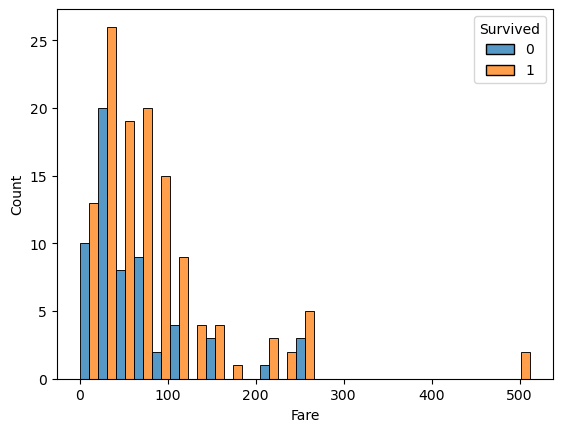

In [198]:
fig = sns.histplot(x=X['Fare'],hue=Y,multiple='dodge')
fig.set_xlabel('Fare')

Now, I will convert all variables to numerical values.

In [199]:
X.drop(columns='PassengerId')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [200]:
X = X.drop(columns = 'Fare')
X = X.drop(columns = 'Name')
X = X.drop(columns = 'Ticket')
X= X.drop(columns = 'Cabin')
X= X.drop(columns = 'Embarked')
X= X.drop(columns = 'PassengerId')
X.head()


,Pclass,Sex,Age,SibSp,Parch
1,1,female,38.0,1,0
3,1,female,35.0,1,0
6,1,male,54.0,0,0
10,3,female,4.0,1,1
11,1,female,58.0,0,0


In [201]:
X = pd.get_dummies(X,drop_first = True)
X.head()

,Pclass,Age,SibSp,Parch,Sex_male
1,1,38.0,1,0,0
3,1,35.0,1,0,0
6,1,54.0,0,0,1
10,3,4.0,1,1,0
11,1,58.0,0,0,0


Now, I will construct my model.

In [202]:
rf= RandomForestClassifier()
para ={'max_depth' : [4,6,8,10],
'min_samples_split' : [5,7,9,11],
'min_samples_leaf':[2,3,4,5]}
scoring = {"f1",'accuracy','precision','recall','roc_auc'}
rf1 = GridSearchCV(rf,para,scoring = scoring,cv=5, refit = 'roc_auc')

In [203]:
model = rf1.fit(X,Y)

Now, I will evaluate model success.

In [204]:
print(model.best_params_)
print(model.best_estimator_)
model.best_score_

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 7}
RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=7)


0.8619583333333335

Now I will feed the test data into the model to make predictions.

In [205]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [206]:
test = test.drop(columns = 'Cabin')
test = test.drop(columns = 'Fare')
test = test.drop(columns = 'Name')
test = test.drop(columns = 'Ticket')
test= test.drop(columns = 'Embarked')
test= test.drop(columns = 'PassengerId')
test.head(5)

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [209]:

test = test.dropna(axis=0)
test = pd.get_dummies(test, drop_first = True)
test.head(5)

,Pclass,Age,SibSp,Parch,Sex_male
0,3,34.5,0,0,1
1,3,47.0,1,0,0
2,2,62.0,0,0,1
3,3,27.0,0,0,1
4,3,22.0,1,1,0


In [210]:
pred = model.predict(test)

In [211]:
pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,

My predictions are included in the variable "pred".

AttributeError: module 'pandas' has no attribute 'to_csv'